# Linear Regression with Torch ( Introduction to Torch)

In this notebook, we will introduce some basic use of `torch.autograd` class to perform a simple linear regression and plot the results. If possible check if we can animate the learning process.

## Linear regression problem

The goal of the **linear regression** problem is to fit a linear model $AX$ to the data. So let's consider a two dimensional data with size $n=100$

In [1]:
%matplotlib inline
from fastai.basics import *

In [18]:
# size of the dataset
n = 100

#dataset
X = torch.ones((n,2))
X[:,0].uniform_(-1,1)

#showing a portion of the data
print(X[:5,:])

tensor([[-0.8960,  1.0000],
        [ 0.1171,  1.0000],
        [ 0.5561,  1.0000],
        [-0.5175,  1.0000],
        [-0.0281,  1.0000]])


In [19]:
#creating the line
a = tensor(3.,2.);a

y = X@a + torch.randn(n)

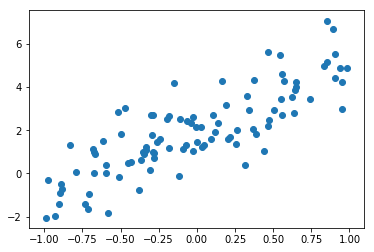

In [20]:
plt.scatter(X[:,0],y)

Let's define the **Mean Square Error**  for the learning process

In [21]:
def mse(y,y_pred): return ((y-y_pred)**2).mean()

Let's start with a random guess for the parameter  a= (-1,1)  and check our loss

In [22]:
#initialiasing the tensor
a = tensor(-1.,1)
#prediction
y_pred = X@a

loss = mse(y,y_pred)
print("   the loss is {:.2f}".format(loss))

   the loss is 6.64


Let's plot the data and the prediction 

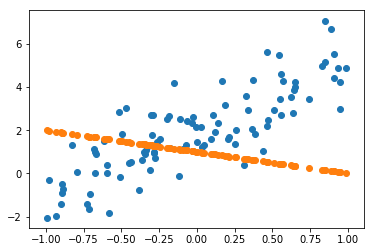

In [23]:
plt.scatter(X[:,0],y)
plt.scatter(X[:,0],y_pred)

The data is way off. So we should correct our **parameters** 

## Gradient Descent

Now we will use tmhe `autograd` class from pytorch to compute the gradient of the loss.

In [24]:
a = nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [25]:
lr = 1e-1
def update():
    """
    Function to compute the loss and update the parameter
    """
    y_pred = X@a
    loss = mse(y,y_pred)
    if t%10==0 : print("   The current loss is {:.4f}".format(loss))
    
    #backward to compute the loss
    loss.backward()
    
    with torch.no_grad():
        a.sub_(lr*a.grad)
        a.grad.zero_()

In [26]:
#lest update the parameter and plot the data
for t in range(100): update()

   The current loss is 6.6428
   The current loss is 2.5661
   The current loss is 1.5951
   The current loss is 1.3115
   The current loss is 1.2280
   The current loss is 1.2034
   The current loss is 1.1962
   The current loss is 1.1940
   The current loss is 1.1934
   The current loss is 1.1932


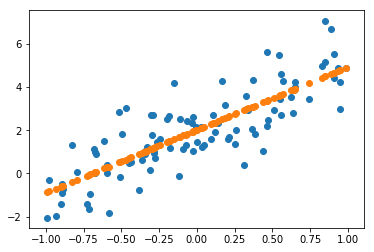

In [27]:
plt.scatter(X[:,0],y)
plt.scatter(X[:,0],X@a)

## Animate it

In [29]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [41]:

#set up a firt plot
a= nn.Parameter(tensor(-1.,1));

fig = plt.figure()
plt.scatter(X[:,0],y,c='orange')
line, = plt.plot(X[:,0],X@a)
plt.close()


#animation function
def animate(i):
    update()
    line.set_ydata(X@a)
    return line

In [42]:
animation.FuncAnimation(fig,animate,np.arange(1,100),interval=10)